In [1]:
#Importing the relevant libraries:
import numpy as np
import pandas as pd
import math as m
import statistics as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
from pandas import datetime
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import norm
import pylab as pl
from matplotlib import collections  as mc

In [2]:
#Perform z-test and record the instances where the temperature needs correction:
def z_test(arr,pop_mean,pop_sd):
    z_critical=1.833 #for two-tailed test, z_critical=+1.96 or -1.96
    X=list()
    colors=list()
    n=len(arr[1])
    
    for i in range(len(arr)):
        z=(st.mean(arr[i])-pop_mean)/(pop_sd/m.sqrt(n))
        if(abs(z)>z_critical):
            colors.append('red')
        elif(abs(z)<z_critical):
            colors.append('green')
    return colors

In [3]:
def windowing(arr,lag,window):
    meansarr=list()
    i=0
    while(True):
        if(i+window)>=len(arr):
            break
        meansarr.append(arr[i:i+window])
        i=i+lag
    meansarr=np.array(meansarr)
    return meansarr,window

In [4]:
def rolling_window_z_test(csv_name,lag,window,pop_mean,pop_sd):
    data = pd.read_csv(csv_name, header='infer', squeeze='None')
    df = pd.DataFrame(data)
    
    A1 = df.loc[df['Location'] == 'A1F']
    A1 = A1.drop(['Location'], axis=1)
    A3 = df.loc[df['Location'] == 'A3F']
    A3 = A3.drop(['Location'], axis=1)
    
    A1['Temperature'] = A1['Temperature'].astype(float)
    A3['Temperature'] = A3['Temperature'].astype(float)
    
    #A1 = A1.set_index(A1['Date/Time'])
    #A3 = A3.set_index(A3['Date/Time'])
    
    A1.reset_index(drop=True,inplace=True)
    A3.reset_index(drop=True,inplace=True)
    
    tmA1 = A1['Temperature']
    tmA3 = A3['Temperature']
    tmA1 = tmA1.values
    tmA3 = tmA3.values
    meansA1,w = windowing(tmA1,lag,window)
    meansA3,w = windowing(tmA3,lag,window)
    
    avgA1=[]
    avgA3=[]
    for i in range(len(meansA1)):
        avgA1.append(st.mean(meansA1[i]))
    for i in range(len(meansA3)):
        avgA3.append(st.mean(meansA3[i]))
    
    colorsA1 = z_test(meansA1,pop_mean,pop_sd)
    colorsA3 = z_test(meansA3,pop_mean,pop_sd)
    
    A1 = A1.drop(A1.index[0:w])
    A1.reset_index(drop=True,inplace=True)
    ind = list()
    
    for i in range(len(A1)):
        if((i)%lag!=0):
            ind.append(i)
    A1 = A1.drop(index=ind)
    A1.reset_index(drop=True,inplace=True)
    A1['Rolling Averages'] = avgA1
    A1['Colors'] = colorsA1
    
    return A1

In [5]:
def z_test_plot(R):
    x = R['Date/Time']
    y = R['Rolling Averages']
    y = np.array(y)
    c = R['Colors']
    c = list(c)
    n_hrs = len(x)//60
    end = (n_hrs+1)*60
    lbl = list()
    tk = np.arange(0,end,60)
    for i in tk:
        lbl.append(x[i][10:15])

    for i in range(len(R)):
        if c[i] == 'red':
            plt.scatter(x[i],y[i],s=1.7,c='r')
        elif c[i] == 'green':
            plt.scatter(x[i],y[i],s=1.7,c='g')
            
    
    plt.xticks(ticks=tk, labels=lbl, size=13)
    plt.yticks(size=13)
    plt.title('Averaged Temperature Over Time', size=17)
    plt.xlabel('Time', size=14, weight='bold')
    plt.ylabel('Averaged Temperature (10 mins)', size=14, weight='bold')
    mpl.rcParams['xtick.major.size'] = 3
    mpl.rcParams['xtick.major.width'] = 3
    mpl.rcParams['ytick.major.size'] = 3
    mpl.rcParams['ytick.major.width'] = 3
    labels_legend = ["Red = Temperature Out of Range","Green = Temperature Within Range"]
    plt.legend(labels_legend)
    plt.show()
    return tk

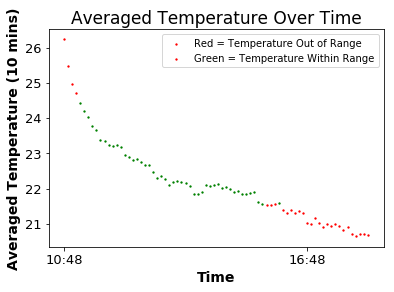

array([ 0, 60])

In [6]:
R = rolling_window_z_test('Datasets/19-05-13_temp_log.csv',6,10,23,2.5)
z_test_plot(R)

In [ ]:
R = rolling_window_z_test('Datasets/19-05-13_temp_log.csv',5,12,24,2.5)
z_test_plot(R)

In [7]:
R

,Date/Time,Temperature,Rolling Averages,Colors
0,5/13/2019 10:48,25.812,26.2374,red
1,5/13/2019 10:54,24.562,25.4749,red
2,5/13/2019 11:00,24.937,24.9811,red
3,5/13/2019 11:06,24.625,24.6999,red
4,5/13/2019 11:12,23.812,24.4186,green
5,5/13/2019 11:18,24.125,24.1936,green
6,5/13/2019 11:24,23.937,24.0375,green
7,5/13/2019 11:30,23.875,23.7811,green
8,5/13/2019 11:36,23.125,23.6497,green
9,5/13/2019 11:42,23.000,23.3749,green
